The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


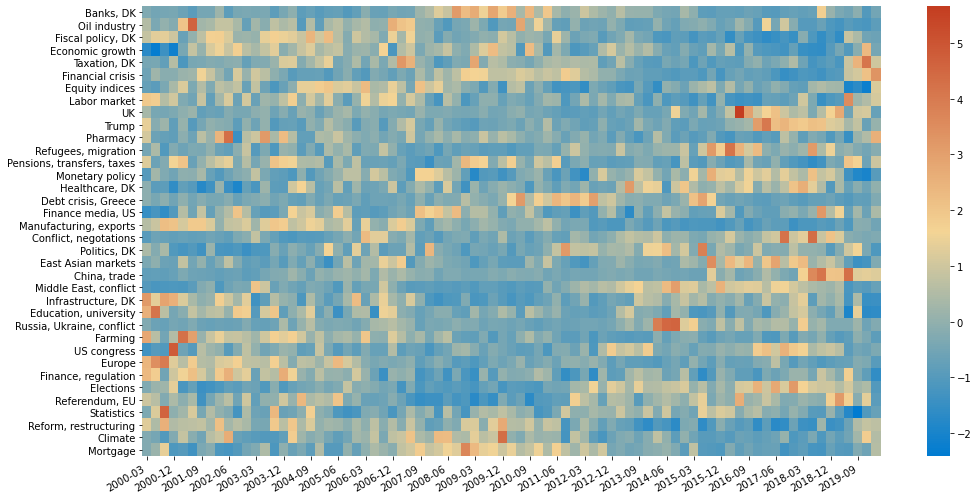

In [8]:
%load_ext autoreload
%autoreload 2
import os
import sys
#hacky spyder crap
#sys.path.insert(1, 'C:\\Users\\EGR\\AppData\\Roaming\\Python\\Python37\\site-packages')
sys.path.insert(1, 'C:\\projects\\FUI')
import codecs
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.dates as mdates
from src.fui.indices import LDAIndexer
from src.fui.utils import params

#international = LDAIndexer(name='ep')
#df = international.build(num_topics=90,topics=['EP'],topic_thold=0.5,frq='Q')

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter("%Y")

label_path = os.path.join(params().paths['topic_labels'],
                          'labels' + str(90) + '.json')
with codecs.open(label_path, 'r', encoding='utf-8-sig') as f:
    labels = json.load(f)

dft=df.drop(columns = ['idx'], axis=1).transpose()
dft.columns = dft.columns.strftime('%Y-%m')

nbcm = LinearSegmentedColormap.from_list(
        'nbcm', [(0/255,123/255,209/255),  (244/255,212/255,149/255), (196/255,61/255,33/255)], N=200)

fig, ax = plt.subplots(1,1, figsize=(15,8))

ax = sns.heatmap(dft, cmap=nbcm, linewidths=0, annot=False, xticklabels =3)
ax.set_yticklabels([labels[str(i)] for i in dft.index])

plt.tight_layout()
fig.autofmt_xdate()
plt.savefig('C:/projects/FUI/figures/topics_over_time_heatmap.pdf', dpi=300)
